## 1. Importing libraries & DataFrame

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json
import os

In [2]:
%matplotlib inline

In [3]:
#Importing DF
path = r'C:\Users\William Inglish\Project 6 Liquor Sales'

df_sales = pd.read_csv(os.path.join(path,'02 Data', 'Prepared', 'Sales_Wrangled.csv'), index_col = 0)

In [4]:
#Checking dataset
df_sales.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county_name,...,item_number,item_description,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [5]:
df_sales.shape

(2805307, 24)

## 2. Json/GeoJSON file import

In [6]:
# Importing from data.iowa.gov

f = open(r'C:\Users\William Inglish\Project 6 Liquor Sales\02 Data\Original\IowaCounties.json')

county_iowa = json.load(f)

In [7]:
county_iowa

{'type': 'Topology',
 'transform': {'scale': [0.0017669358765993605, 0.0012457790492015905],
  'translate': [-96.62384631382284, 40.37865860641297]},
 'arcs': [[[2448, 1540], [133, 0]],
  [[2581, 1540], [132, 1]],
  [[2713, 1541], [0, -350]],
  [[2713, 1191], [-265, 1]],
  [[2448, 1192], [0, 348]],
  [[1218, 625], [130, 0]],
  [[1348, 625], [129, 0]],
  [[1477, 625], [-1, -209]],
  [[1476, 416], [-258, 2]],
  [[1218, 418], [0, 207]],
  [[1234, 1819], [267, 0]],
  [[1501, 1819], [0, -70]],
  [[1501, 1749], [22, -69], [1, -210]],
  [[1524, 1470], [-132, 0]],
  [[1392, 1470], [-132, -1]],
  [[1260, 1469], [0, 212], [-26, 0], [0, 69]],
  [[1234, 1750], [0, 69]],
  [[2713, 1191], [1, -281]],
  [[2714, 910], [-66, -1]],
  [[2648, 909], [-199, -1]],
  [[2449, 908], [-1, 284]],
  [[500, 1752], [200, 0]],
  [[700, 1752], [0, -70], [37, 0], [-1, -212]],
  [[736, 1470], [-196, 1]],
  [[540, 1471], [1, 211], [-42, 0], [1, 70]],
  [[1234, 2309], [0, 197]],
  [[1234, 2506], [30, 0], [80, 0], [157, -

In [27]:
# Assigning list to f
f = county_iowa['objects']['cb_2015_iowa_county_20m']['geometries']
f

[{'arcs': [[0, 1, 2, 3, 4]],
  'type': 'Polygon',
  'properties': {'STATEFP': '19',
   'COUNTYFP': '011',
   'COUNTYNS': '00465195',
   'AFFGEOID': '0500000US19011',
   'GEOID': '19011',
   'NAME': 'Benton',
   'LSAD': '06',
   'ALAND': 1855117304,
   'AWATER': 5760770}},
 {'arcs': [[5, 6, 7, 8, 9]],
  'type': 'Polygon',
  'properties': {'STATEFP': '19',
   'COUNTYFP': '175',
   'COUNTYNS': '00465276',
   'AFFGEOID': '0500000US19175',
   'GEOID': '19175',
   'NAME': 'Union',
   'LSAD': '06',
   'ALAND': 1097235771,
   'AWATER': 5575853}},
 {'arcs': [[10, 11, 12, 13, 14, 15, 16]],
  'type': 'Polygon',
  'properties': {'STATEFP': '19',
   'COUNTYFP': '187',
   'COUNTYNS': '00465282',
   'AFFGEOID': '0500000US19187',
   'GEOID': '19187',
   'NAME': 'Webster',
   'LSAD': '06',
   'ALAND': 1853443705,
   'AWATER': 7277624}},
 {'arcs': [[-4, 17, 18, 19, 20]],
  'type': 'Polygon',
  'properties': {'STATEFP': '19',
   'COUNTYFP': '095',
   'COUNTYNS': '00465236',
   'AFFGEOID': '0500000US19095

In [49]:
# Making a list into a dictionary using for loop
for county_name in f:
    print(county_name)

{'arcs': [[0, 1, 2, 3, 4]], 'type': 'Polygon', 'properties': {'STATEFP': '19', 'COUNTYFP': '011', 'COUNTYNS': '00465195', 'AFFGEOID': '0500000US19011', 'GEOID': '19011', 'NAME': 'Benton', 'LSAD': '06', 'ALAND': 1855117304, 'AWATER': 5760770}}
{'arcs': [[5, 6, 7, 8, 9]], 'type': 'Polygon', 'properties': {'STATEFP': '19', 'COUNTYFP': '175', 'COUNTYNS': '00465276', 'AFFGEOID': '0500000US19175', 'GEOID': '19175', 'NAME': 'Union', 'LSAD': '06', 'ALAND': 1097235771, 'AWATER': 5575853}}
{'arcs': [[10, 11, 12, 13, 14, 15, 16]], 'type': 'Polygon', 'properties': {'STATEFP': '19', 'COUNTYFP': '187', 'COUNTYNS': '00465282', 'AFFGEOID': '0500000US19187', 'GEOID': '19187', 'NAME': 'Webster', 'LSAD': '06', 'ALAND': 1853443705, 'AWATER': 7277624}}
{'arcs': [[-4, 17, 18, 19, 20]], 'type': 'Polygon', 'properties': {'STATEFP': '19', 'COUNTYFP': '095', 'COUNTYNS': '00465236', 'AFFGEOID': '0500000US19095', 'GEOID': '19095', 'NAME': 'Iowa', 'LSAD': '06', 'ALAND': 1518916016, 'AWATER': 2686847}}
{'arcs': [[2

In [48]:
# Verifying list is a dictionary now
county_name

{'arcs': [[-171, -257, -260, -190, -203]],
 'type': 'Polygon',
 'properties': {'STATEFP': '19',
  'COUNTYFP': '137',
  'COUNTYNS': '00465257',
  'AFFGEOID': '0500000US19137',
  'GEOID': '19137',
  'NAME': 'Montgomery',
  'LSAD': '06',
  'ALAND': 1098405694,
  'AWATER': 2410445}}

## 3. Wrangling Data

It should be wrangled, but I want to double check everything once more.

In [8]:
df_sales.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
address                       142
city                          142
zip_code                      142
store_location             330335
county_number                 142
county_name                   142
category_code                   0
category_name                   0
vendor_number                   4
vendor_name                     4
item_number                     0
item_description                0
package_size                    0
bottle_volume_ml                0
state_bottle_cost               0
state_bottle_retail             0
bottles_sold                    0
sale_dollars                    0
volume_sold_liters              0
volume_sold_gallons             0
dtype: int64

I will keep all of these except I will need to maybe filter the store locations If I don't plan to use them

In [9]:
duplicate_sales = df_sales[df_sales.duplicated()]

In [10]:
duplicate_sales.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county_name,...,item_number,item_description,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons


No Duplicate records

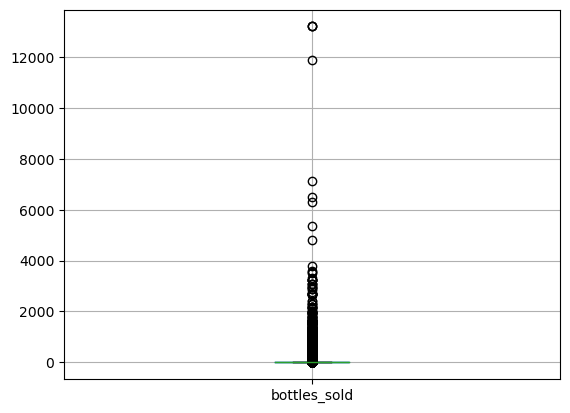

In [11]:
boxplot2 = df_sales.boxplot(column=['bottles_sold'])

In [12]:
# I downsized the column "bottles_sold" to get better range.

df_sales_wrangled = df_sales[df_sales['bottles_sold'] <= 25]

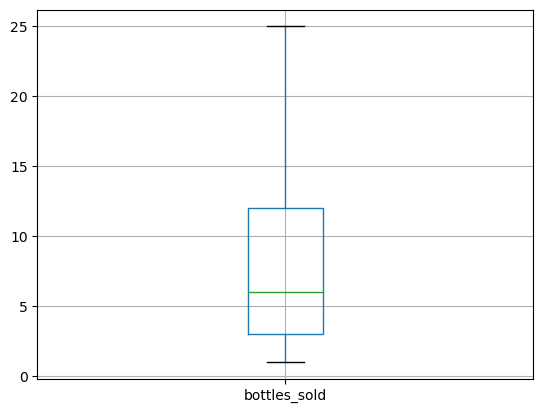

In [13]:
boxplot2 = df_sales_wrangled.boxplot(column=['bottles_sold'])

In [14]:
df_sales_wrangled.shape

(2651460, 24)

## 4. Creating Choropleth maps

In [15]:
# Looking at a county geospatial

data_bottles = df_sales_wrangled[['county_name','bottles_sold']]

In [16]:
data_bottles.shape

(2651460, 2)

In [17]:
# Looking at any formatting issues

print(pd.unique(data_bottles['county_name']))

['DUBUQUE' 'HARDIN' 'POLK' 'BUTLER' 'BENTON' 'MUSCATINE' 'BUENA VIST'
 'LINN' 'CLINTON' 'SAC' 'MITCHELL' 'POWESHIEK' 'SCOTT' 'JOHNSON' 'CEDAR'
 'FRANKLIN' 'Linn' 'CARROLL' 'OBRIEN' 'GRUNDY' 'KOSSUTH' 'STORY'
 'CHICKASAW' 'CLARKE' 'MAHASKA' 'BLACK HAWK' 'IOWA' 'JACKSON' 'IDA'
 'WARREN' 'CHEROKEE' 'GREENE' 'WORTH' 'WEBSTER' 'CALHOUN' 'CERRO GORD'
 'Polk' 'HOWARD' 'MARSHALL' 'WAPELLO' 'FLOYD' 'HAMILTON' 'WOODBURY'
 'MARION' 'LYON' 'Delaware' 'DALLAS' 'FAYETTE' 'JASPER' 'SHELBY'
 'PLYMOUTH' 'AUDUBON' 'MONONA' 'CRAWFORD' 'BUCHANAN' 'SIOUX' 'TAMA'
 'WINNESHIEK' 'DELAWARE' 'HARRISON' 'BREMER' 'CLAYTON' 'Webster' 'OSCEOLA'
 'Black Hawk' 'Dallas' 'JONES' 'JEFFERSON' 'PALO ALTO' 'POTTAWATTA'
 'KEOKUK' 'HANCOCK' 'WRIGHT' 'DICKINSON' 'CLAY' 'WASHINGTON' 'EMMET' 'LEE'
 'WINNEBAGO' 'VAN BUREN' 'Wapello' 'MILLS' 'DAVIS' 'HENRY' 'Hancock'
 'WAYNE' 'GUTHRIE' 'APPANOOSE' 'ADAMS' 'ADAIR' 'MONROE' 'DES MOINES'
 'ALLAMAKEE' 'Marion' 'BOONE' 'UNION' 'CASS' 'PAGE' 'MONTGOMERY' 'Adair'
 'HUMBOLDT' 'POCAHONTAS

In [18]:
# Limiting the data for better memory 

# selected_counties = ['DUBUQUE','HARDIN','POLK','BUTLER','BENTON','MUSCATINE','BUENA VIST','LINN','CLINTON','SAC','MITCHELL','POWESHIEK','SCOTT','JOHNSON','CEDAR']


In [19]:
# Formatting county_name to match json file

data_bottles['county_name'] = data_bottles['county_name'].str.title()
data_bottles.head()

C:\Users\William Inglish\AppData\Local\Temp\ipykernel_14120\448813398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bottles['county_name'] = data_bottles['county_name'].str.title()


,county_name,bottles_sold
1,Dubuque,4
2,Hardin,6
3,Hardin,12
4,Polk,2
5,Butler,6


In [33]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth mapping bottles sold column and county column

folium.Choropleth(
    geo_data = county_name,
    data = data_bottles,
    columns = ['county_name', 'bottles_sold'],
    key_on = 'properties.NAME', # check your geojson file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Number of bottles sold").add_to(map)
folium.LayerControl().add_to(map)

map

AttributeError: 'NoneType' object has no attribute 'get'

In [ ]:
map.save('plot_county_bottles.html')

In [ ]:
# Looking at a city geospatial

data_bottles = df_sales_wrangled[['city','bottles_sold']]

In [ ]:
# Setup a folium map at a high-level zoom
map2 = folium.Map(location = [40, -95], zoom_start = 4)

# Choropleth mapping bottles sold column and 
folium.Choropleth(
    geo_data = county_iowa,
    data = data_bottles,
    columns = ['county_name', 'bottles_sold'],
    key_on = 'feature.properties.city', # check your geojson file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Number of bottles sold").add_to(map1)
folium.LayerControl().add_to(map01)

map2

In [ ]:
map2.save('plot2_city_bottles.html')